In [1]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score

In [2]:
# read the CSV file
df = pd.read_csv(r'C:\Users\Saemi\OneDrive\Education\WGU\D209 Data Mining I\PA1\medical_clean.csv')
# check the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [3]:
# visually inspect the dataframe. Explorate the data and spot the problems
df.head(5)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [6]:
df['Marital'].value_counts()

Marital
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: count, dtype: int64

In [7]:
df['Gender'].value_counts()

Gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64

In [8]:
df['Initial_admin'].value_counts()

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

In [9]:
df['HighBlood'].value_counts()

HighBlood
No     5910
Yes    4090
Name: count, dtype: int64

In [10]:
df['Complication_risk'].value_counts()

Complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64

In [11]:
df['Overweight'].value_counts()

Overweight
Yes    7094
No     2906
Name: count, dtype: int64

In [12]:
df['Arthritis'].value_counts()

Arthritis
No     6426
Yes    3574
Name: count, dtype: int64

In [13]:
df['Diabetes'].value_counts()

Diabetes
No     7262
Yes    2738
Name: count, dtype: int64

In [14]:
df['BackPain'].value_counts()

BackPain
No     5886
Yes    4114
Name: count, dtype: int64

In [15]:
df['Anxiety'].value_counts()

Anxiety
No     6785
Yes    3215
Name: count, dtype: int64

In [16]:
df['Asthma'].value_counts()

Asthma
No     7107
Yes    2893
Name: count, dtype: int64

In [17]:
df['Services'].value_counts()

Services
Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: count, dtype: int64

In [18]:
df['Age'].describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [19]:
df['Income'].describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

In [20]:
df['VitD_levels'].describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

In [21]:
df['Initial_days'].describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [22]:
df['TotalCharge'].describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

In [23]:
search_cols1 = ['Income',  'HighBlood', 'Arthritis', 'Overweight', 
               'Diabetes', 'BackPain', 'Anxiety', 'Asthma', 'Age', 'VitD_levels', 'Initial_days', 'TotalCharge']
search_cols2 = ['Marital', 'Gender', 'Initial_admin', 'Complication_risk', 'Services']
initial_model1 = df[search_cols1]
initial_model2= df[search_cols2]

In [25]:
one_hot1 = pd.get_dummies(initial_model1, drop_first=True)
one_hot2 = pd.get_dummies(initial_model2)
one_hot1

,Income,Age,VitD_levels,Initial_days,TotalCharge,HighBlood_Yes,Arthritis_Yes,Overweight_Yes,Diabetes_Yes,BackPain_Yes,Anxiety_Yes,Asthma_Yes
0,86575.93,53,19.141466,10.585770,3726.702860,True,True,False,True,True,True,True
1,46805.99,51,18.940352,15.129562,4193.190458,True,False,True,False,False,False,False
2,14370.14,53,18.057507,4.772177,2434.234222,True,False,True,True,False,False,False
3,39741.49,78,16.576858,1.714879,2127.830423,False,True,False,False,False,False,True
4,1209.56,22,17.439069,1.254807,2113.073274,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,45967.61,25,16.980860,51.561220,6850.942000,True,False,False,False,False,True,False
9996,14983.02,87,18.177020,68.668240,7741.690000,True,True,True,True,False,False,True
9997,65917.81,45,17.129070,70.154180,8276.481000,True,False,True,False,False,True,False
9998,29702.32,43,19.910430,63.356900,7644.483000,False,False,True,False,True,False,False


In [26]:
one_hot2

,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Female,Gender_Male,Gender_Nonbinary,Initial_admin_Elective Admission,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Complication_risk_High,Complication_risk_Low,Complication_risk_Medium,Services_Blood Work,Services_CT Scan,Services_Intravenous,Services_MRI
0,True,False,False,False,False,False,True,False,False,True,False,False,False,True,True,False,False,False
1,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False
2,False,False,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False
3,False,True,False,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False
4,False,False,False,False,True,True,False,False,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,True,False
9996,False,False,False,False,True,False,True,False,True,False,False,False,False,True,False,True,False,False
9997,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False
9998,True,False,False,False,False,False,True,False,False,True,False,False,False,True,True,False,False,False


In [27]:
# update the invalid column names
one_hot2.rename(columns={'Marital_Never Married':'Marital_Never_Married',
                        'Initial_admin_Elective Admission': "Initial_admin_Elective_Admission",
                        'Initial_admin_Emergency Admission':'Initial_admin_Emergency_Admission',
                        'Initial_admin_Observation Admission':'Initial_admin_Observation_Admission',
                        'Services_CT Scan':'Services_CT_Scan'}, inplace=True)

In [28]:
one_hot2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Marital_Divorced                     10000 non-null  bool 
 1   Marital_Married                      10000 non-null  bool 
 2   Marital_Never_Married                10000 non-null  bool 
 3   Marital_Separated                    10000 non-null  bool 
 4   Marital_Widowed                      10000 non-null  bool 
 5   Gender_Female                        10000 non-null  bool 
 6   Gender_Male                          10000 non-null  bool 
 7   Gender_Nonbinary                     10000 non-null  bool 
 8   Initial_admin_Elective_Admission     10000 non-null  bool 
 9   Initial_admin_Emergency_Admission    10000 non-null  bool 
 10  Initial_admin_Observation_Admission  10000 non-null  bool 
 11  Complication_risk_High               10000 non-null  bo

In [30]:
final = pd.concat([one_hot1, one_hot2], axis=1)
final

,Income,Age,VitD_levels,Initial_days,TotalCharge,HighBlood_Yes,Arthritis_Yes,Overweight_Yes,Diabetes_Yes,BackPain_Yes,...,Initial_admin_Elective_Admission,Initial_admin_Emergency_Admission,Initial_admin_Observation_Admission,Complication_risk_High,Complication_risk_Low,Complication_risk_Medium,Services_Blood Work,Services_CT_Scan,Services_Intravenous,Services_MRI
0,86575.93,53,19.141466,10.585770,3726.702860,True,True,False,True,True,...,False,True,False,False,False,True,True,False,False,False
1,46805.99,51,18.940352,15.129562,4193.190458,True,False,True,False,False,...,False,True,False,True,False,False,False,False,True,False
2,14370.14,53,18.057507,4.772177,2434.234222,True,False,True,True,False,...,True,False,False,False,False,True,True,False,False,False
3,39741.49,78,16.576858,1.714879,2127.830423,False,True,False,False,False,...,True,False,False,False,False,True,True,False,False,False
4,1209.56,22,17.439069,1.254807,2113.073274,False,False,False,False,False,...,True,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,45967.61,25,16.980860,51.561220,6850.942000,True,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
9996,14983.02,87,18.177020,68.668240,7741.690000,True,True,True,True,False,...,True,False,False,False,False,True,False,True,False,False
9997,65917.81,45,17.129070,70.154180,8276.481000,True,False,True,False,False,...,True,False,False,True,False,False,False,False,True,False
9998,29702.32,43,19.910430,63.356900,7644.483000,False,False,True,False,True,...,False,True,False,False,False,True,True,False,False,False


In [31]:
# update the data type from categorical(bool) to numerical(into64)
bool_cols = list(final.select_dtypes(include='bool'))
bool_cols

['HighBlood_Yes',
 'Arthritis_Yes',
 'Overweight_Yes',
 'Diabetes_Yes',
 'BackPain_Yes',
 'Anxiety_Yes',
 'Asthma_Yes',
 'Marital_Divorced',
 'Marital_Married',
 'Marital_Never_Married',
 'Marital_Separated',
 'Marital_Widowed',
 'Gender_Female',
 'Gender_Male',
 'Gender_Nonbinary',
 'Initial_admin_Elective_Admission',
 'Initial_admin_Emergency_Admission',
 'Initial_admin_Observation_Admission',
 'Complication_risk_High',
 'Complication_risk_Low',
 'Complication_risk_Medium',
 'Services_Blood Work',
 'Services_CT_Scan',
 'Services_Intravenous',
 'Services_MRI']

In [33]:
for col in bool_cols:
    final[col] = final[col].astype(dtype='int64')
    
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Income                               10000 non-null  float64
 1   Age                                  10000 non-null  int64  
 2   VitD_levels                          10000 non-null  float64
 3   Initial_days                         10000 non-null  float64
 4   TotalCharge                          10000 non-null  float64
 5   HighBlood_Yes                        10000 non-null  int64  
 6   Arthritis_Yes                        10000 non-null  int64  
 7   Overweight_Yes                       10000 non-null  int64  
 8   Diabetes_Yes                         10000 non-null  int64  
 9   BackPain_Yes                         10000 non-null  int64  
 10  Anxiety_Yes                          10000 non-null  int64  
 11  Asthma_Yes                   

In [35]:
final.head()

,Income,Age,VitD_levels,Initial_days,TotalCharge,HighBlood_Yes,Arthritis_Yes,Overweight_Yes,Diabetes_Yes,BackPain_Yes,...,Initial_admin_Elective_Admission,Initial_admin_Emergency_Admission,Initial_admin_Observation_Admission,Complication_risk_High,Complication_risk_Low,Complication_risk_Medium,Services_Blood Work,Services_CT_Scan,Services_Intravenous,Services_MRI
0,86575.93,53,19.141466,10.585770,3726.702860,1,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0
1,46805.99,51,18.940352,15.129562,4193.190458,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
2,14370.14,53,18.057507,4.772177,2434.234222,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
3,39741.49,78,16.576858,1.714879,2127.830423,0,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0
4,1209.56,22,17.439069,1.254807,2113.073274,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


In [37]:
# normalize the numeric values
final_scaled = pd.DataFrame(MinMaxScaler().fit_transform(final), columns=final.columns)
final_scaled.head()

,Income,Age,VitD_levels,Initial_days,TotalCharge,HighBlood_Yes,Arthritis_Yes,Overweight_Yes,Diabetes_Yes,BackPain_Yes,...,Initial_admin_Elective_Admission,Initial_admin_Emergency_Admission,Initial_admin_Observation_Admission,Complication_risk_High,Complication_risk_Low,Complication_risk_Medium,Services_Blood Work,Services_CT_Scan,Services_Intravenous,Services_MRI
0,0.417305,0.492958,0.562756,0.135022,0.246933,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.225268,0.464789,0.550632,0.199037,0.311343,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.068645,0.492958,0.497410,0.053117,0.068475,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.191156,0.845070,0.408150,0.010044,0.026168,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.005097,0.056338,0.460128,0.003562,0.024130,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [38]:
# use SelectKBest to determine the best predictors
search_cols_noHB = final_scaled.columns.values.tolist()
search_cols_noHB.remove('HighBlood_Yes')

X = final_scaled[search_cols_noHB]
y = final_scaled['HighBlood_Yes']

skbest = SelectKBest(score_func=f_classif, k='all')
skbest.fit_transform(X, y)

array([[0.4173053 , 0.49295775, 0.56275633, ..., 0.        , 0.        ,
        0.        ],
       [0.22526814, 0.46478873, 0.55063228, ..., 0.        , 1.        ,
        0.        ],
       [0.06864511, 0.49295775, 0.49741026, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.31755341, 0.38028169, 0.44143972, ..., 0.        , 1.        ,
        0.        ],
       [0.14267963, 0.35211268, 0.60911309, ..., 0.        , 0.        ,
        0.        ],
       [0.30193169, 0.73239437, 0.51737128, ..., 0.        , 0.        ,
        0.        ]])

In [39]:
# filter the predictors that the p-value < 0.05
skbest_pval = pd.DataFrame({'Feature':X.columns, 'p_value':skbest.pvalues_}).sort_values('p_value')
skbest_pval[skbest_pval['p_value'] < 0.05]

,Feature,p_value
23,Complication_risk_Low,0.005258
6,Overweight_Yes,0.008711
12,Marital_Married,0.015962
4,TotalCharge,0.046489


In [40]:
best_cols = ['Complication_risk_Low', 'Overweight_Yes','Marital_Married', 'TotalCharge', 'HighBlood_Yes']
final_data = final_scaled[best_cols]
final_data.head()

,Complication_risk_Low,Overweight_Yes,Marital_Married,TotalCharge,HighBlood_Yes
0,0.0,0.0,0.0,0.246933,1.0
1,0.0,1.0,1.0,0.311343,1.0
2,0.0,1.0,0.0,0.068475,1.0
3,0.0,0.0,1.0,0.026168,0.0
4,1.0,0.0,0.0,0.024130,0.0


In [41]:
final_data.to_csv('final.csv')

In [42]:
# split the data to training & test set
search_cols_noHB = ['Complication_risk_Low', 'Overweight_Yes', 'Marital_Married', 'TotalCharge']

X = final_data[search_cols_noHB]
y = final_data['HighBlood_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [43]:
# save each X/y and test/train set to csv
X_train.to_csv('X_Train.csv')
X_test.to_csv('X_Test.csv')
y_train.to_csv('y_Train.csv')
y_test.to_csv('y_Test.csv')

In [44]:
# determine what is the best n-neighbors number for KNN classification
parameters = {"n_neighbors": np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid=parameters)
knn_cv.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [45]:
print("Best No. of Parameters: ", knn_cv.best_params_)
print("Best Score: ", knn_cv.best_score_)

Best No. of Parameters:  {'n_neighbors': 34}
Best Score:  0.579


In [46]:
# fit the KNN model using grid search result of k = 34
knn = KNeighborsClassifier(n_neighbors=34)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)[:,1]

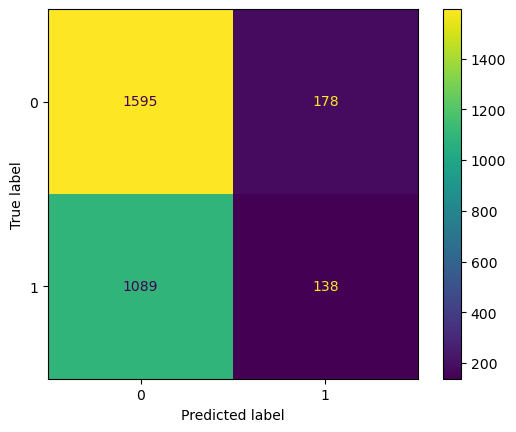

In [47]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.59      0.90      0.72      1773
         1.0       0.44      0.11      0.18      1227

    accuracy                           0.58      3000
   macro avg       0.52      0.51      0.45      3000
weighted avg       0.53      0.58      0.50      3000



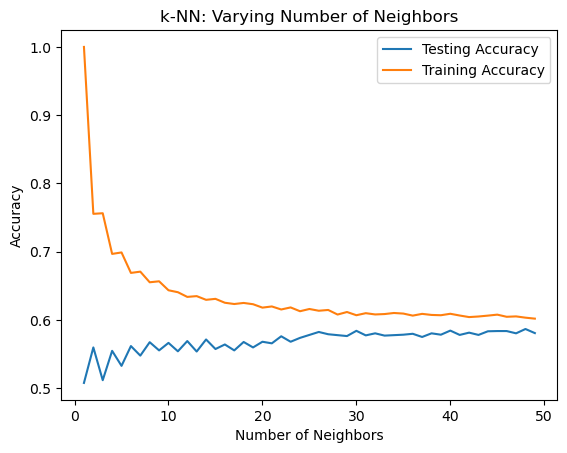

In [49]:
# model complexity curve
neighbors = np.arange(1,50)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# loop over different values of k
for i, k in enumerate(neighbors):
    # setup k-NN classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    # compute accuracy on the training & test set
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
# generate the plot
plt.title ('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [50]:
# print accuracy on train & test set
print("Train Accuracy: {}".format(train_accuracy[i]))
print("Test Accuracy: {}".format(test_accuracy[i]))

Train Accuracy: 0.6018571428571429
Test Accuracy: 0.5806666666666667


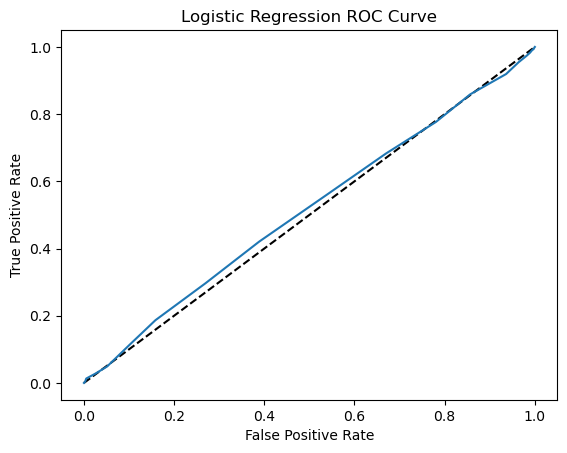

In [51]:
# plot roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [52]:
# print AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_prob)
print("AUC-ROC Score: {}".format(auc_roc))

AUC-ROC Score: 0.5136030312516232
